<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [ ]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [1]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [ ]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [ ]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


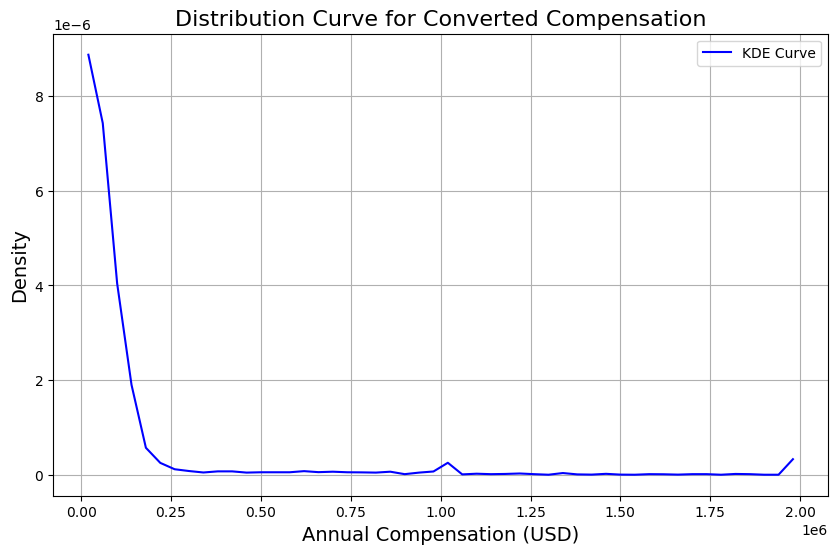

In [6]:
# your code goes here

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"
df = pd.read_csv(file_name)

df_cleaned = df['ConvertedComp'].dropna()


plt.figure(figsize=(10, 6))

data = df_cleaned.values
density, bins = np.histogram(data, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.plot(bin_centers, density, color="blue", label="KDE Curve")

plt.title("Distribution Curve for Converted Compensation", fontsize=16)
plt.xlabel("Annual Compensation (USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()



Plot the histogram for the column `ConvertedComp`.


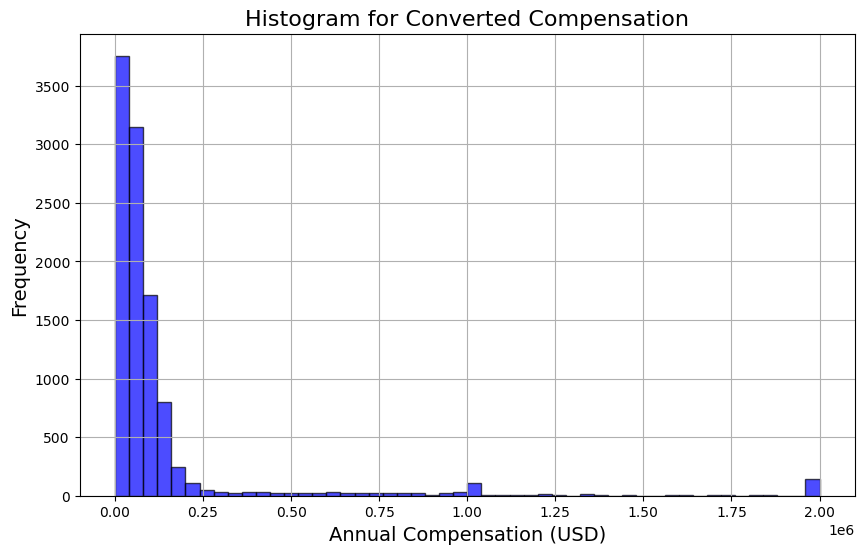

In [7]:
# your code goes here
# your code goes here

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"
df = pd.read_csv(file_name)

df_cleaned = df['ConvertedComp'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned, bins=50, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram for Converted Compensation", fontsize=16)
plt.xlabel("Annual Compensation (USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()



What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
median_value = df_cleaned.median()

print(f"The median of the column 'ConvertedComp' is: {median_value}")

The median of the column 'ConvertedComp' is: 57745.0


How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
man_count = df[df['Gender'] == 'Man'].shape[0]

print(f"The number of respondents who identified themselves only as a 'Man' is: {man_count}")

The number of respondents who identified themselves only as a 'Man' is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
woman_data = df[df['Gender'] == 'Woman']

woman_comp_cleaned = woman_data['ConvertedComp'].dropna()

median_woman_comp = woman_comp_cleaned.median()

print(f"The median ConvertedComp for respondents identified as 'Woman' is: {median_woman_comp}")

The median ConvertedComp for respondents identified as 'Woman' is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
age_cleaned = df['Age'].dropna()

min_age = age_cleaned.min()
q1_age = age_cleaned.quantile(0.25)
median_age = age_cleaned.median()
q3_age = age_cleaned.quantile(0.75)
max_age = age_cleaned.max()

print("Five-Number Summary for 'Age':")
print(f"Minimum: {min_age}")
print(f"First Quartile (Q1): {q1_age}")
print(f"Median: {median_age}")
print(f"Third Quartile (Q3): {q3_age}")
print(f"Maximum: {max_age}")

Five-Number Summary for 'Age':
Minimum: 16.0
First Quartile (Q1): 25.0
Median: 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


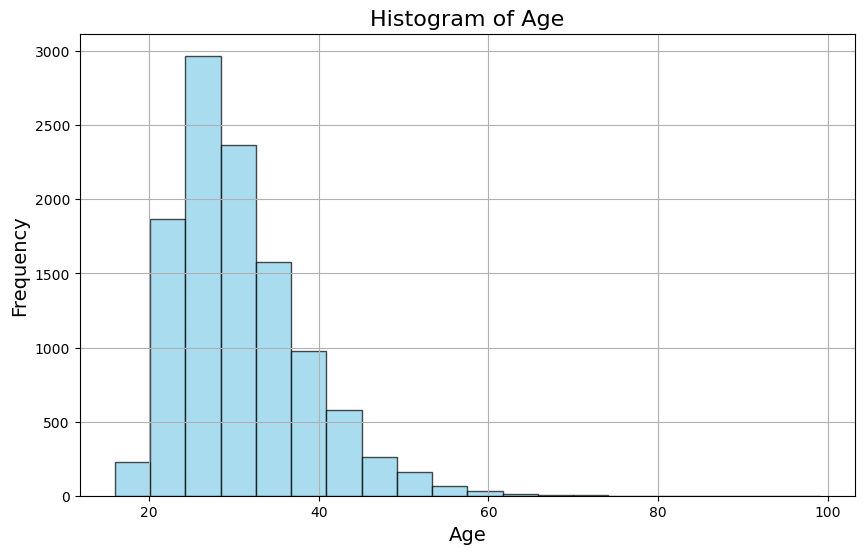

The age group with the highest number of respondents is: 21-30 with 6186 respondents.
The number of outliers below Q1 in the 'Age' column is: 0


In [26]:
# your code goes here

plt.figure(figsize=(10, 6))
plt.hist(age_cleaned, bins=20, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()


age_cleaned = df['Age'].dropna()

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust as needed
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

age_groups = pd.cut(age_cleaned, bins=bins, labels=labels, include_lowest=True)

age_group_counts = age_groups.value_counts().sort_index()


most_respondents_group = age_group_counts.idxmax()
most_respondents_count = age_group_counts.max()
print(f"The age group with the highest number of respondents is: {most_respondents_group} with {most_respondents_count} respondents.")

q1 = age_cleaned.quantile(0.25)
q3 = age_cleaned.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr

outliers_below_q1 = age_cleaned[age_cleaned < lower_bound]

num_outliers_below_q1 = outliers_below_q1.shape[0]

print(f"The number of outliers below Q1 in the 'Age' column is: {num_outliers_below_q1}")

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


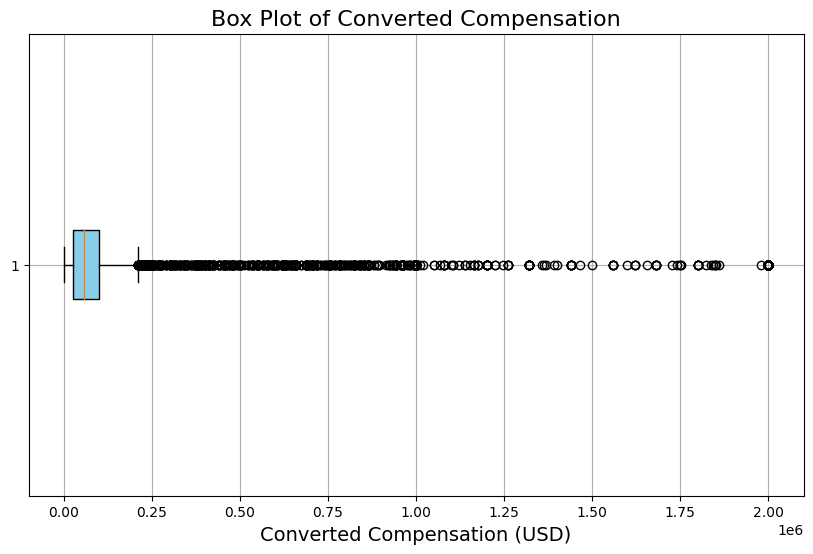

In [13]:
# your code goes here
comp_cleaned = df['ConvertedComp'].dropna()

plt.figure(figsize=(10, 6))
plt.boxplot(comp_cleaned, vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Box Plot of Converted Compensation", fontsize=16)
plt.xlabel("Converted Compensation (USD)", fontsize=14)
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
# your code goes here

q1 = comp_cleaned.quantile(0.25)  # First quartile
q3 = comp_cleaned.quantile(0.75)  # Third quartile
iqr = q3 - q1  # Interquartile Range

print(f"Interquartile Range (IQR) for 'ConvertedComp': {iqr}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")

Interquartile Range (IQR) for 'ConvertedComp': 73132.0
Q1 (25th percentile): 26868.0
Q3 (75th percentile): 100000.0


Find out the upper and lower bounds.


In [15]:
# your code goes here
q1 = comp_cleaned.quantile(0.25)
q3 = comp_cleaned.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
# your code goes here
q1 = comp_cleaned.quantile(0.25)
q3 = comp_cleaned.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = comp_cleaned[(comp_cleaned < lower_bound) | (comp_cleaned > upper_bound)]

num_outliers = outliers.shape[0]

print(f"The number of outliers in the 'ConvertedComp' column is: {num_outliers}")

The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [25]:
# your code goes here

q1 = comp_cleaned.quantile(0.25)
q3 = comp_cleaned.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(f"The new DataFrame has {df_no_outliers.shape[0]} rows and {df_no_outliers.shape[1]} columns.")



q1 = comp_cleaned.quantile(0.25)
q3 = comp_cleaned.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

comp_no_outliers = comp_cleaned[(comp_cleaned >= lower_bound) & (comp_cleaned <= upper_bound)]

median_no_outliers = comp_no_outliers.median()

print(f"The median of 'ConvertedComp' after removing outliers is: {median_no_outliers}")

The new DataFrame has 9703 rows and 85 columns.
The median of 'ConvertedComp' after removing outliers is: 52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [18]:
# your code goes here

numerical_cols = df.select_dtypes(include='number')

age_correlation = numerical_cols.corrwith(numerical_cols['Age'])

print("Correlation of 'Age' with other numerical columns:")
print(age_correlation)

Correlation of 'Age' with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
